In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.DataFrame(pd.read_csv('C:\Users\STS\Downloads\Lead Scoring Assignment\Leads.csv'))
data.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
data.drop_duplicates(subset='Prospect ID',inplace = True)

In [5]:
data.shape

(9240, 37)

In [6]:
# Converting 'Select' values to NaN.
data = data.replace('Select', np.nan)

In [7]:
data.isnull().sum()*100/data.shape[0]

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
data['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

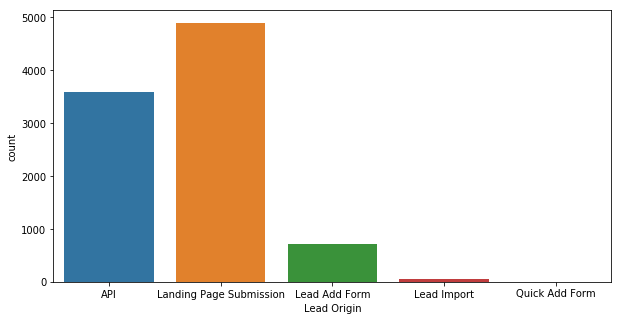

In [9]:
#API and Landing Page Submission higher compared to other origins
plt.figure(figsize=(10, 5))
sns.countplot(data['Lead Origin'])

In [10]:
data['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [11]:
data = data.replace('google', 'Google')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

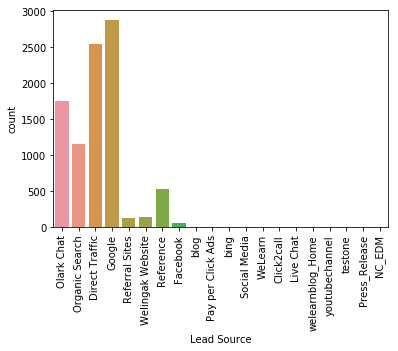

In [19]:
# Olark Chat,Organic Search,Direct Traffic and Google are Higher leading source
sns.countplot(data['Lead Source'])
plt.xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

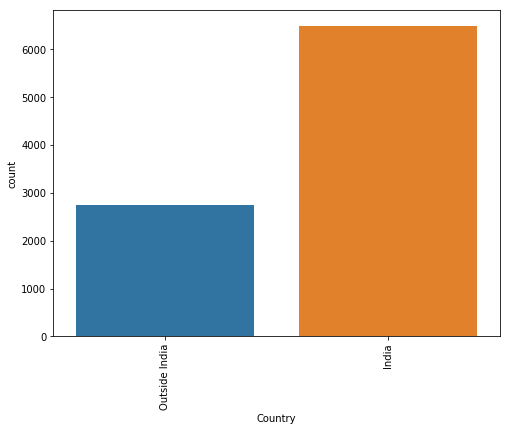

In [20]:
# 26% values is null, most of the leads are from India.
# Better to put all other countries under one value ("Outside India")
# Null values , can be made to India.
from matplotlib.pyplot import xticks
plt.figure(figsize=(8, 6))
sns.countplot(data['Country'])
plt.xticks(rotation = 90)

In [21]:
#Putting all other countries under one value ("Outside India")
data['Country'] = np.where(data['Country'] != 'India', 'Outside India', data['Country'])

In [22]:
# Converting 'Select' values to NaN.
data['Country'] = data['Country'].replace(np.nan, 'India')

In [23]:
data['Country'].value_counts()

India            6492
Outside India    2748
Name: Country, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

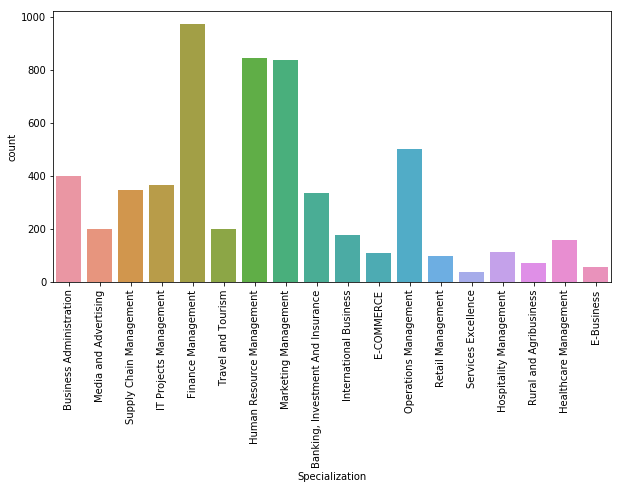

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(data['Specialization'])
xticks(rotation = 90)

In [30]:
# Most of the values are null, nearly 75%,so dropping
data= data.drop('How did you hear about X Education', axis=1)
data.shape

KeyError: "['How did you hear about X Education'] not found in axis"

In [31]:
data['What is your current occupation'].value_counts()


Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

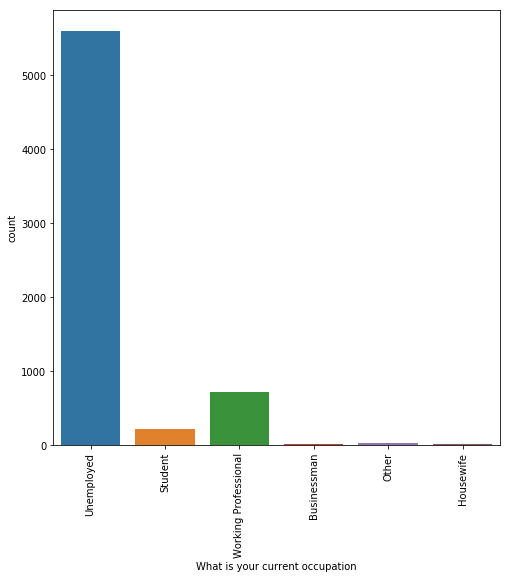

In [32]:
plt.figure(figsize=(8, 8))
sns.countplot(data['What is your current occupation'])
xticks(rotation = 90)

In [33]:
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [34]:
# 70 % is better career prospects, other option are single digit,nan can be convert to better career prospects
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

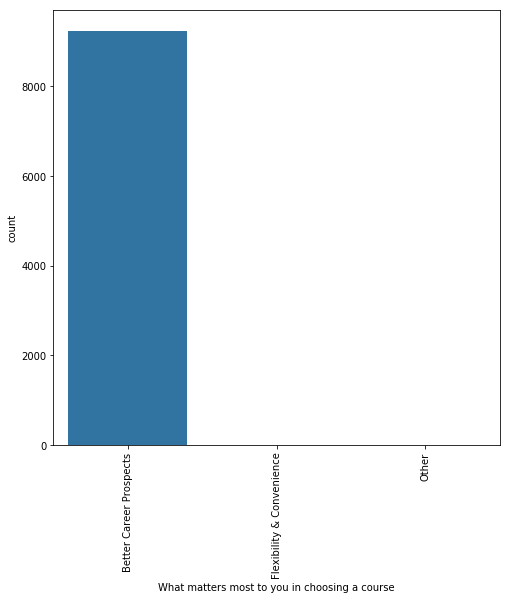

In [35]:
plt.figure(figsize=(8, 8))
sns.countplot(data['What matters most to you in choosing a course'])
xticks(rotation = 90)

In [36]:
data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

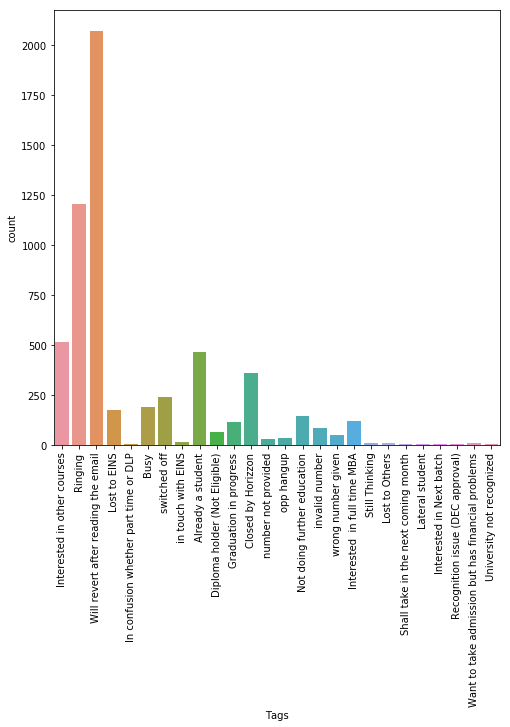

In [37]:
plt.figure(figsize=(8, 8))
sns.countplot(data['Tags'])
xticks(rotation = 90)

In [38]:
#Changing the null to Unknown, as it is set by customer
data['Tags'].fillna("Unknown", inplace = True)

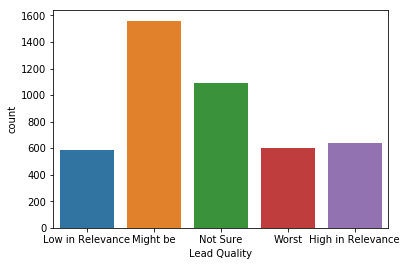

In [39]:
sns.countplot(data['Lead Quality'])

In [40]:
# as there are lot of 
data['Lead Quality'].fillna("Not Sure", inplace = True)


In [41]:
data['Lead Profile'].unique()

array([nan, 'Potential Lead', 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

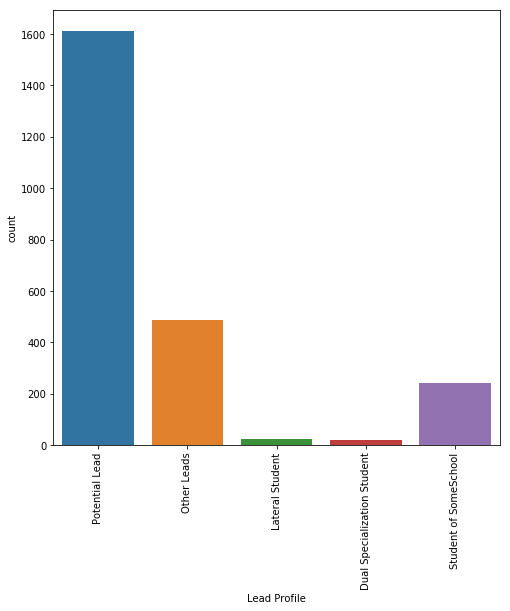

In [42]:
plt.figure(figsize=(8, 8))
sns.countplot(data['Lead Profile'])
xticks(rotation = 90)

In [43]:
data['Lead Profile'].isnull().sum()


6855

In [44]:
#Removing as 70% is null.
data = data.drop('Lead Profile', axis=1)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

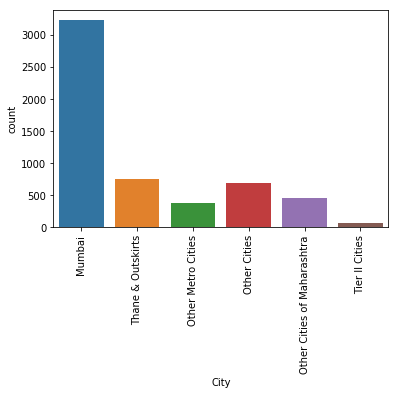

In [45]:
sns.countplot(data['City'])
from matplotlib.pyplot import xticks
xticks(rotation = 90)

In [46]:

data['Asymmetrique Activity Index'].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

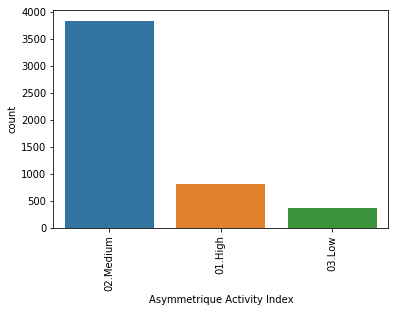

In [47]:
sns.countplot(data['Asymmetrique Activity Index'])
from matplotlib.pyplot import xticks
xticks(rotation = 90)

In [48]:
data['Asymmetrique Profile Index'].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

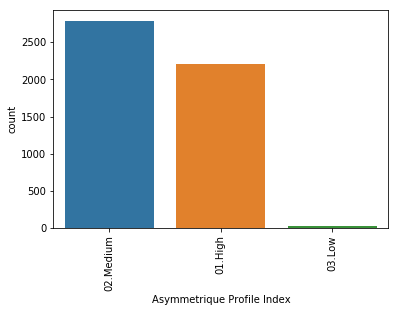

In [49]:
sns.countplot(data['Asymmetrique Profile Index'])
from matplotlib.pyplot import xticks
xticks(rotation = 90)

In [50]:
#Removing the Score, as the index is calculated based on this
data = data.drop('Asymmetrique Activity Score', axis=1)
data = data.drop('Asymmetrique Profile Score', axis=1)

In [51]:
data['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

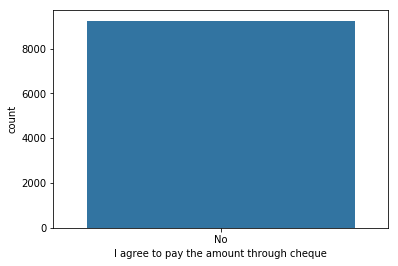

In [52]:
sns.countplot(data['I agree to pay the amount through cheque'])

In [53]:
# Remove as all the values are same
data = data.drop('I agree to pay the amount through cheque', axis=1)

In [54]:
data['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

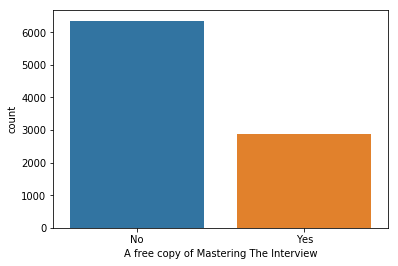

In [55]:
sns.countplot(data['A free copy of Mastering The Interview'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

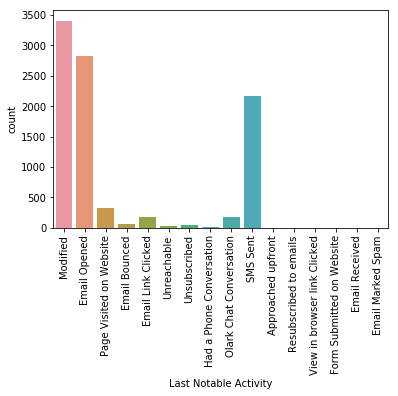

In [56]:
sns.countplot(data['Last Notable Activity'])
xticks(rotation = 90)

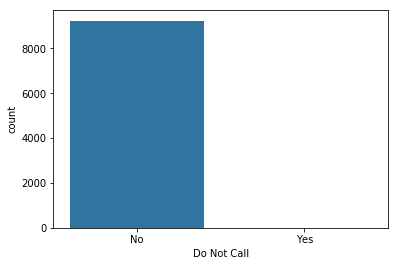

In [57]:
sns.countplot(data['Do Not Call'])

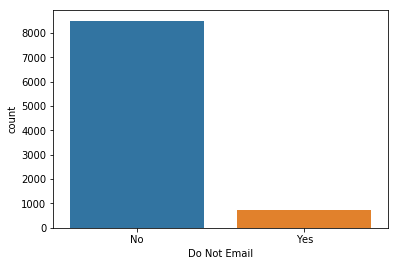

In [58]:
sns.countplot(data['Do Not Email'])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

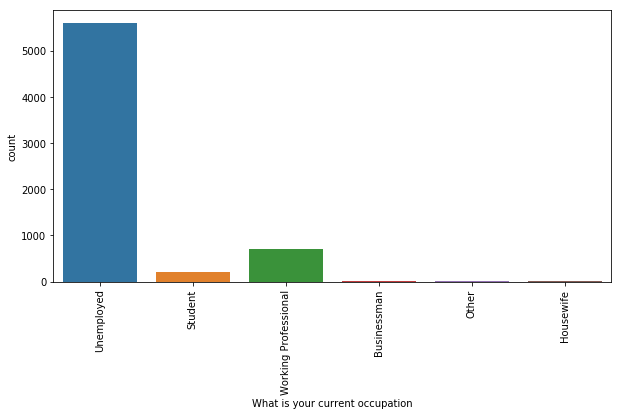

In [59]:
plt.figure(figsize=(10, 5))

sns.countplot(data['What is your current occupation'])
from matplotlib.pyplot import xticks
xticks(rotation = 90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

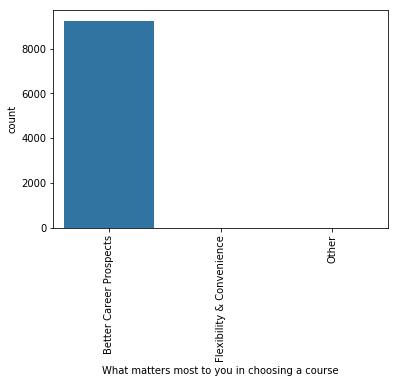

In [60]:
sns.countplot(data['What matters most to you in choosing a course'])
from matplotlib.pyplot import xticks
xticks(rotation = 90)

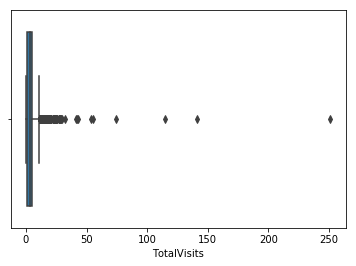

In [61]:
sns.boxplot(data['TotalVisits'])

In [62]:
Q1 = data.TotalVisits.quantile(0.05)
Q2 = data.TotalVisits.quantile(0.95)
data= data[(data.TotalVisits>=Q1) & (data.TotalVisits<=Q2)]

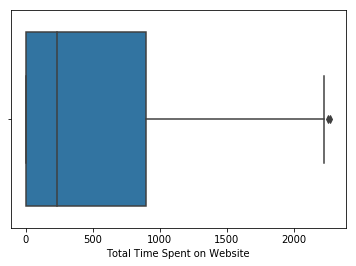

In [63]:
sns.boxplot(data['Total Time Spent on Website'])

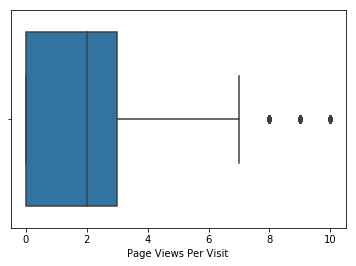

In [64]:
sns.boxplot(data['Page Views Per Visit'])

In [65]:
Q1 = data['Page Views Per Visit'].quantile(0.05)
Q2 = data['Page Views Per Visit'].quantile(0.95)
data= data[(data['Page Views Per Visit']>=Q1) & (data['Page Views Per Visit']<=Q2)]

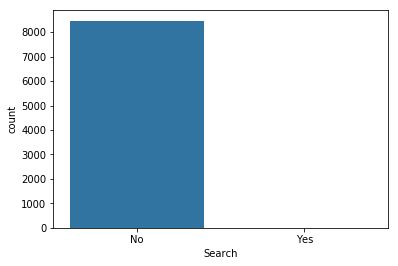

In [66]:
sns.countplot(data['Search'])


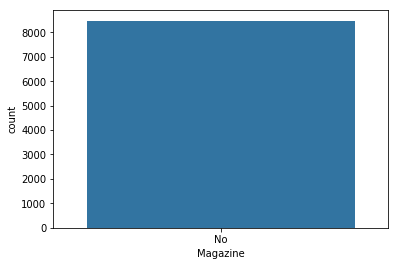

In [67]:
sns.countplot(data['Magazine'])

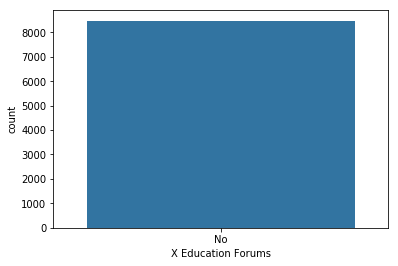

In [68]:
sns.countplot(data['X Education Forums'])

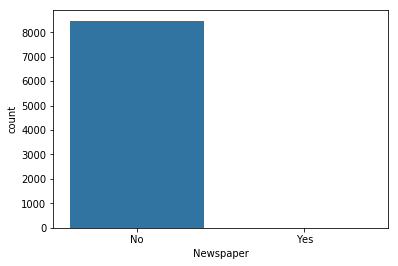

In [69]:
sns.countplot(data['Newspaper'])


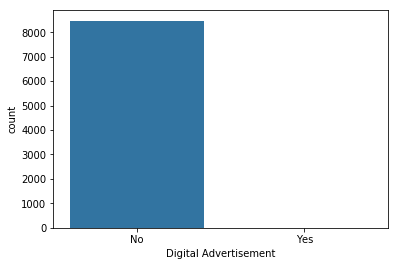

In [70]:
sns.countplot(data['Digital Advertisement'])

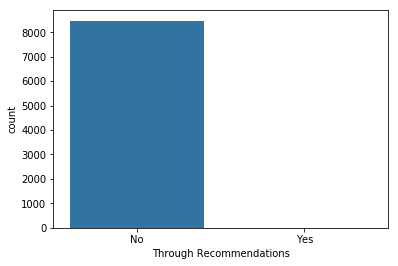

In [71]:
sns.countplot(data['Through Recommendations'])


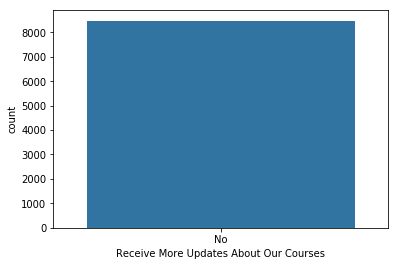

In [72]:
sns.countplot(data['Receive More Updates About Our Courses'])

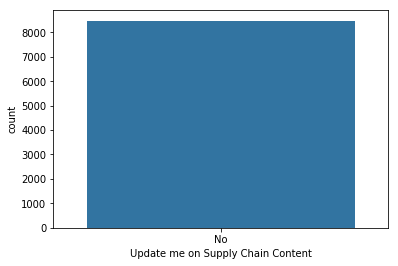

In [73]:
sns.countplot(data['Update me on Supply Chain Content'])

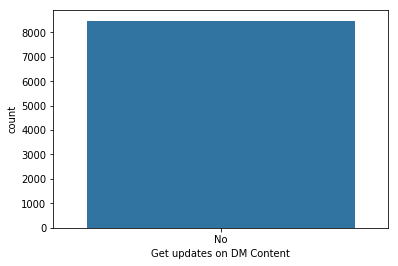

In [74]:
sns.countplot(data['Get updates on DM Content'])

In [75]:
data = data.drop('Prospect ID', axis=1)

In [76]:
data = data.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
          'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
          'A free copy of Mastering The Interview'],axis=1)
        

In [77]:
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity',
                             'Country','What matters most to you in choosing a course','Asymmetrique Activity Index','Asymmetrique Profile Index']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Country_Outside India,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [78]:
# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)
data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Country_Outside India,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,1,0,0,1,0,1,0
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,1,0,1,0
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,1,0,0,0
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,0,0,0,0,0,0,1,0,0,0
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,0,1,0,0,0


In [79]:
data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity','Country','What matters most to you in choosing a course','Asymmetrique Activity Index','Asymmetrique Profile Index'], axis = 1)

In [80]:

varlist =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

data[varlist] = data[varlist].apply(binary_map)



In [81]:
data.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Country_Outside India,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,660727,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,660719,0,0,0,1.0,305,1.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,660681,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [82]:
#Test train split

from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = data.drop(['Lead Number','Converted'], axis=1)

X.head()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Country_Outside India,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [83]:
y = data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [84]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

C:\Users\STS\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\STS\Anaconda2\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\STS\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\STS\Anaconda2\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Country_Outside India,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
7551,0,0,0.964330,-0.106395,1.772003,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8564,0,0,1.390074,0.242047,0.568291,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4354,0,0,-0.738645,-0.297296,-0.635422,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
112,0,0,-1.164389,-0.855174,-1.237278,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7270,0,0,-0.312901,2.497654,-0.635422,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
converted_percentage = (sum(data['Converted'])/len(data['Converted'].index))*100
converted_percentage

0L

In [87]:
import statsmodels.api as sm

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\STS\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\STS\Anaconda2\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: invalid value encountered in divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\STS\Anaconda2\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: divide by zero encountered in divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\STS\Anaconda2\lib\site-packages\statsmodels\genmod\families\links.py:167: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\STS\Anaconda2\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: invalid value encountered in divide
  endog_mu = self._clean(endog / mu)
C:\Users\STS\Anaconda2\lib\site-packages\statsmodels\genmod\families\family.py:879:

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5816
Model Family:                Binomial   Df Model:                          114
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 17 Nov 2019   Deviance:                          nan
Time:                        15:50:12   Pearson chi2:                 2.82e+18
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    1.618e+15   5.54e+07   2.92e+07      0.000    1.62e+15    1.62e+15
Do Not Email                                                            -2.259e+14    4.7e+06  -4.81e+07      0.000   -2.26e+14   -2.26e+14
Do Not Call                                                              9.247e+14   4.79e+07   1.93e+07      0.000    9.25e+14    9.25e+14
TotalVisits                                                              3.802e+13   1.52e+06    2.5e+07      0.000     3.8e+13     3.8e+13
Total Time Spent on Website                                              3.408e+14   1.09e+06   3.14e+08      0.000    3.41e+14    3.41e+14
Page Views Per Visit                                                    -1.121e+14   1.66e+06  -6.76e+07      0.000   -1.12e+14   -1.12e+14
Lead Origin_Landing Page Submission                                     -2.767e+13   3.58e+06  -7.72e+06      0.000   -2.77e+13   -2.77e+13
Lead Origin_Lead Add Form                                                -4.35e+14   3.93e+07  -1.11e+07      0.000   -4.35e+14   -4.35e+14
Lead Origin_Lead Import                                                  1.383e+14   2.17e+07   6.36e+06      0.000    1.38e+14    1.38e+14
Lead Source_Direct Traffic                                              -8.206e+14   4.04e+07  -2.03e+07      0.000   -8.21e+14   -8.21e+14
Lead Source_Facebook                                                     1.383e+14   2.17e+07   6.36e+06      0.000    1.38e+14    1.38e+14
Lead Source_Google                                                      -8.104e+14   4.04e+07  -2.01e+07      0.000    -8.1e+14    -8.1e+14
Lead Source_Live Chat                                                    7.037e+15   6.88e+07   1.02e+08      0.000    7.04e+15    7.04e+15
Lead Source_NC_EDM                                                       8.384e+15   7.85e+07   1.07e+08      0.000    8.38e+15    8.38e+15
Lead Source_Olark Chat                                                  -6.637e+14   4.02e+07  -1.65e+07      0.000   -6.64e+14   -6.64e+14
Lead Source_Organic Search                                              -8.314e+14   4.05e+07  -2.05e+07      0.000   -8.31e+14   -8.31e+14
Lead Source_Pay per Click Ads                                           -3.495e+15   7.85e+07  -4.45e+07      0.000    -3.5e+15    -3.5e+15
Lead Source_Press_Release                                               -3.947e+15    7.9e+07  -4.99e+07      0.000   -3.95e+15   -3.95e+15
Lead Source_Reference                                                   -3.147e+14   1.52e+07  -2.07e+07      0.000   -3.15e+14   -3.15e+14
Lead Source_Referral Sites                                              -9.026e+14

In [88]:
X_train.columns

Index([u'Do Not Email', u'Do Not Call', u'TotalVisits',
       u'Total Time Spent on Website', u'Page Views Per Visit',
       u'Lead Origin_Landing Page Submission', u'Lead Origin_Lead Add Form',
       u'Lead Origin_Lead Import', u'Lead Source_Direct Traffic',
       u'Lead Source_Facebook',
       ...
       u'Last Notable Activity_Unreachable',
       u'Last Notable Activity_Unsubscribed',
       u'Last Notable Activity_View in browser link Clicked',
       u'Country_Outside India',
       u'What matters most to you in choosing a course_Flexibility & Convenience',
       u'What matters most to you in choosing a course_Other',
       u'Asymmetrique Activity Index_02.Medium',
       u'Asymmetrique Activity Index_03.Low',
       u'Asymmetrique Profile Index_02.Medium',
       u'Asymmetrique Profile Index_03.Low'],
      dtype='object', length=122)

In [89]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)


C:\Users\STS\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [90]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('Do Not Email', False, 3),
 ('Do Not Call', False, 65),
 ('TotalVisits', False, 64),
 ('Total Time Spent on Website', False, 9),
 ('Page Views Per Visit', False, 58),
 ('Lead Origin_Landing Page Submission', False, 34),
 ('Lead Origin_Lead Add Form', False, 28),
 ('Lead Origin_Lead Import', False, 44),
 ('Lead Source_Direct Traffic', False, 6),
 ('Lead Source_Facebook', False, 31),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Live Chat', False, 98),
 ('Lead Source_NC_EDM', False, 32),
 ('Lead Source_Olark Chat', False, 57),
 ('Lead Source_Organic Search', False, 8),
 ('Lead Source_Pay per Click Ads', False, 93),
 ('Lead Source_Press_Release', False, 99),
 ('Lead Source_Reference', False, 33),
 ('Lead Source_Referral Sites', False, 10),
 ('Lead Source_Social Media', False, 73),
 ('Lead Source_WeLearn', False, 97),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 45),
 ('Lead Source_blog', False, 56),
 ('Lead Source_testone', False, 96),
 ('Lead Source_wele

In [91]:
col = X_train.columns[rfe.support_]
col

Index([u'Lead Source_Welingak Website', u'Last Activity_SMS Sent',
       u'What is your current occupation_Student',
       u'What is your current occupation_Unemployed',
       u'What is your current occupation_Working Professional', u'Tags_Busy',
       u'Tags_Closed by Horizzon', u'Tags_Lost to EINS',
       u'Tags_Not doing further education', u'Tags_Ringing', u'Tags_Unknown',
       u'Tags_Will revert after reading the email', u'Tags_invalid number',
       u'Tags_number not provided', u'Tags_switched off',
       u'Tags_wrong number given', u'Lead Quality_Worst',
       u'Last Notable Activity_Modified',
       u'Last Notable Activity_Olark Chat Conversation',
       u'Asymmetrique Activity Index_03.Low'],
      dtype='object')

In [92]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5910
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1106.5
Date:                Sun, 17 Nov 2019   Deviance:                       2213.1
Time:                        15:50:20   Pearson chi2:                 1.13e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.9761      0.261    -19.062      0.000      -5.488      -4.464
Lead Source_Welingak Website                             3.2691      1.032      3.167      0.002       1.246       5.292
Last Activity_SMS Sent                                   2.1137      0.128     16.552      0.000       1.863       2.364
What is your current occupation_Student                  2.2697      0.559      4.062      0.000       1.175       3.365
What is your current occupation_Unemployed               2.5538      0.150     17.026      0.000       2.260       2.848
What is your current occupation_Working Professional     2.8338      0.381      7.433      0.000       2.087       3.581
Tags_Busy                                                1.7522      0.304      5.769      0.000       1.157       2.347
Tags_Closed by Horizzon                                  8.1544      0.758     10.764      0.000       6.670       9.639
Tags_Lost to EINS                                        9.5322      0.823     11.589      0.000       7.920      11.144
Tags_Not doing further education                       -21.8649    1.9e+04     -0.001      0.999   -3.73e+04    3.72e+04
Tags_Ringing                                            -2.2970      0.321     -7.146      0.000      -2.927      -1.667
Tags_Unknown                                             2.8459      0.235     12.098      0.000       2.385       3.307
Tags_Will revert after reading the email                 5.8932      0.274     21.509      0.000       5.356       6.430
Tags_invalid number                                     -2.1123      1.055     -2.003      0.045      -4.180      -0.045
Tags_number not provided                               -24.2462   5.11e+04     -0.000      1.000      -1e+05       1e+05
Tags_switched off                                       -3.1247      0.750     -4.164      0.000      -4.596      -1.654
Tags_wrong number given                                -24.0097      4e+04     -0.001      1.000   -7.84e+04    7.83e+04
Lead Quality_Worst                                      -2.6763      0.781     -3.428      0.001      -4.206      -1.146
Last Notable Activity_Modified                          -1.4945      0.134    -11.175      0.000      -1.757      -1.232
Last Notable Activity_Olark Chat Conversation           -1.4230      0.431     -3.304      0.001      -2.267      -0.579
Asymmetrique Activity Index_03.Low                      -2.2752      0.475     -4.792      0.000      -3.206      -1.345
========================================================================================================================
"""

In [93]:
col1 = col.drop('Tags_number not provided',1)
col1 = col1.drop('Tags_wrong number given',1)
col1 = col1.drop('Tags_Not doing further education',1)



In [94]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5913
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1116.3
Date:                Sun, 17 Nov 2019   Deviance:                       2232.6
Time:                        15:50:22   Pearson chi2:                 1.10e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.2853      0.262    -20.144      0.000      -5.799      -4.771
Lead Source_Welingak Website                             3.2701      1.032      3.170      0.002       1.248       5.292
Last Activity_SMS Sent                                   2.0605      0.126     16.388      0.000       1.814       2.307
What is your current occupation_Student                  2.2829      0.564      4.049      0.000       1.178       3.388
What is your current occupation_Unemployed               2.5390      0.149     17.040      0.000       2.247       2.831
What is your current occupation_Working Professional     2.8481      0.385      7.395      0.000       2.093       3.603
Tags_Busy                                                2.0986      0.301      6.982      0.000       1.509       2.688
Tags_Closed by Horizzon                                  8.4478      0.758     11.138      0.000       6.961       9.934
Tags_Lost to EINS                                        9.7944      0.820     11.943      0.000       8.187      11.402
Tags_Ringing                                            -1.9306      0.317     -6.093      0.000      -2.552      -1.310
Tags_Unknown                                             3.1723      0.235     13.499      0.000       2.712       3.633
Tags_Will revert after reading the email                 6.2021      0.275     22.523      0.000       5.662       6.742
Tags_invalid number                                     -1.7531      1.053     -1.665      0.096      -3.816       0.310
Tags_switched off                                       -2.7546      0.748     -3.681      0.000      -4.221      -1.288
Lead Quality_Worst                                      -2.5719      0.793     -3.242      0.001      -4.127      -1.017
Last Notable Activity_Modified                          -1.4667      0.133    -10.992      0.000      -1.728      -1.205
Last Notable Activity_Olark Chat Conversation           -1.4225      0.431     -3.303      0.001      -2.267      -0.578
Asymmetrique Activity Index_03.Low                      -2.2547      0.476     -4.732      0.000      -3.189      -1.321
========================================================================================================================
"""

In [95]:

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7551    0.001180
8564    0.923196
4354    0.027128
112     0.997553
7270    0.604931
8712    0.027128
642     0.604931
5209    0.068094
7658    0.994833
809     0.019765
dtype: float64

In [96]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00118048, 0.92319632, 0.02712787, 0.99755348, 0.60493074,
       0.02712787, 0.60493074, 0.06809398, 0.99483317, 0.01976461])

In [97]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.001180,7551
1,1,0.923196,8564
2,0,0.027128,4354
3,1,0.997553,112
4,1,0.604931,7270


In [98]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.001180,7551,0
1,1,0.923196,8564,1
2,0,0.027128,4354,0
3,1,0.997553,112,1
4,1,0.604931,7270,1


In [99]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3555  133]
 [ 298 1945]]


In [100]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))


0.9273309728544933


In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

TypeError: cannot convert the series to <type 'float'>

In [105]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)


cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensi  speci
0.0   0.0       0.0    1.0    0.0
0.1   0.1       0.0    0.0    0.0
0.2   0.2       0.0    0.0    0.0
0.3   0.3       0.0    0.0    0.0
0.4   0.4       0.0    0.0    0.0
0.5   0.5       0.0    0.0    0.0
0.6   0.6       0.0    0.0    0.0
0.7   0.7       0.0    0.0    0.0
0.8   0.8       0.0    0.0    0.0
0.9   0.9       0.0    0.0    0.0


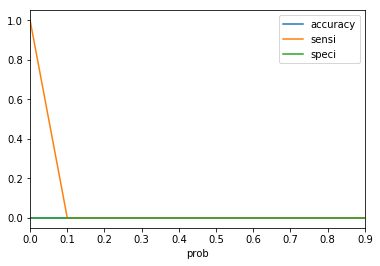

In [106]:
#ROC line can be drawn, use different from the code
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [108]:
#Assign lead score = conversion probability to 
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Lead_Score
0,0,0.001180,7551,0,1,0,0,0,0,0,0,0,0,0,0.0
1,1,0.923196,8564,1,1,1,1,1,1,1,1,1,1,1,92.0
2,0,0.027128,4354,0,1,0,0,0,0,0,0,0,0,0,3.0
3,1,0.997553,112,1,1,1,1,1,1,1,1,1,1,1,100.0
4,1,0.604931,7270,1,1,1,1,1,1,1,1,0,0,0,60.0


In [110]:
# check the accuracy ,specificity
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [111]:
#check against the test data, check the accurcy
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

C:\Users\STS\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\STS\Anaconda2\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\STS\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Country_Outside India,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
7551,0,0,0.964330,-0.106395,1.772003,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8564,0,0,1.390074,0.242047,0.568291,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4354,0,0,-0.738645,-0.297296,-0.635422,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
112,0,0,-1.164389,-0.855174,-1.237278,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7270,0,0,-0.312901,2.497654,-0.635422,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
X_test = X_test[col1]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_Worst,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Asymmetrique Activity Index_03.Low
6233,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
339,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2519,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2410,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1534,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [114]:
X_test_sm = sm.add_constant(X_test)

In [115]:
y_test_pred = res.predict(X_test_sm)

In [116]:
y_test_pred[:10]

6233    0.009222
339     0.001551
2519    0.994833
2410    0.104106
1534    0.179586
3534    0.004067
7789    0.995996
8670    0.107842
9035    0.107842
8070    0.997057
dtype: float64

In [136]:
# Converting y_pred to a dataframe which is an array
y_pred_tst1 = pd.DataFrame(y_test_pred)

In [137]:
y_pred_tst1.head()

,0
6233,0.009222
339,0.001551
2519,0.994833
2410,0.104106
1534,0.179586


In [138]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [139]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [140]:
# Removing index for both dataframes to append them side by side 
y_pred_tst1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [141]:
# Appending y_test_df and y_pred_1
y_pred_tst1 = pd.concat([y_test_df, y_pred_tst1],axis=1)

In [142]:
y_pred_tst1.head()

,Converted,Prospect ID,0
0,0,6233,0.009222
1,0,339,0.001551
2,1,2519,0.994833
3,0,2410,0.104106
4,0,1534,0.179586


In [143]:
# Renaming the column 
y_pred_tst1= y_pred_tst1.rename(columns={ 0 : 'Converted_prob'})

In [144]:
# Rearranging the columns
y_pred_tst1 = y_pred_tst1.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)

C:\Users\STS\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


In [145]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,6233,0,0.009222,0
1,339,0,0.001551,0
2,2519,1,0.994833,1
3,2410,0,0.104106,0
4,1534,0,0.179586,0


In [127]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [128]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,6233,0,0.009222,0
1,339,0,0.001551,0
2,2519,1,0.994833,1
3,2410,0,0.104106,0
4,1534,0,0.179586,0


In [129]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9237121510027526

In [130]:
# Let us calculate specificity
TN / float(TN+FP)

0.963937093275488